In [12]:
from simple_pid import PID

In [96]:
hourly_growth_rate = 0.12

def simulation(duration_m, init_OD=1.0, pid=None, volume=2):
    OD_state = []
    OD = init_OD
    
    for i in range(duration_m):
        OD *= np.exp(hourly_growth_rate / 60 + 0.0005 * np.random.randn())
        
        if (i % 30 == 0) and i > 0:
            output = pid(OD, dt=30)
            print(output)
            OD *= (1-(output * volume ) / 14)
            
    
        OD_state.append(OD)

    return OD_state



0
0
0.11964443849445126
0.9045681151201013
0.8232063952379054
0.46202147583435305
0.43235404147794965
0.4636606424218037
0.6001747630701812
0.6505959641598542
0.5381564389690563
0.454439465490754
0.6130480972774066
0.5867402473435948
0.5791054763169559
0.5283792242271261
0.5612171395092509
0.5696942907865941
0.5219698568196729
0.4880436222493021
0.6000761501444949
0.5301522089858717
0.4909147102418252
0
0
0
0.9104254040192654
0.2156483078753213
0.34884619606579204
0.47385847847633156
0.4392883011439064
0.4204184651739922
0.39894412767455933
0.37954693154740404
0.42259482449898167
0.4200441401431185
0.39098943043781276
0.3433118774546162
0.426869050058019
0.4623778527245954
0.3397225953079148
0.40589020472110104
0.4136253928147722
0.3491437554604724
0.4800937007369577
0.36760450436961056


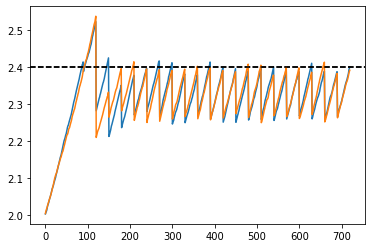

In [98]:
duration_m = 60 * 12
setpoint = 2.4
init_OD = 2.

pid = PID(-2, -0.15, -0, output_limits=(0, 1), sample_time=None)
pid.setpoint = setpoint

y = simulation(duration_m, init_OD=init_OD, pid=pid, volume=1.5)


t = np.arange(duration_m)
plt.plot(t, y)
plt.axhline(setpoint, c="k", ls="--")


pid = PID(-2, -0.15, -0, output_limits=(0, 1), sample_time=None)
pid.setpoint = setpoint

y = simulation(duration_m, init_OD=init_OD, pid=pid, volume=2)


t = np.arange(duration_m)
plt.plot(t, y)
plt.axhline(setpoint, c="k", ls="--")